# SVM

## Load data

In [2]:
import numpy as np
import matplotlib.pyplot as plt


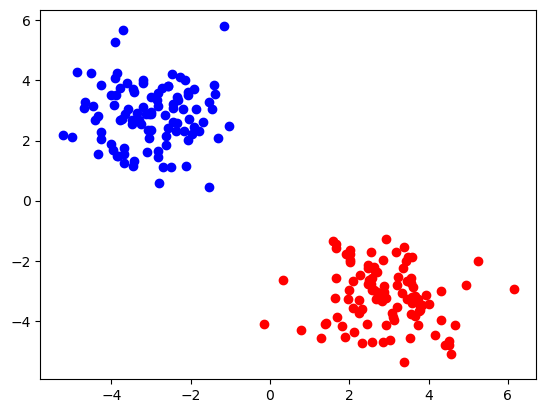

In [95]:
n = 100
d = 2
ranges = 3
postives = np.random.randn(n, d) + np.array([ranges, -ranges])
negatives = np.random.randn(n, d) + np.array([-ranges, ranges])

plt.scatter(postives[:, 0], postives[:, 1], color='red')
plt.scatter(negatives[:, 0], negatives[:, 1], color='blue')

In [96]:
postives.shape, negatives.shape

((100, 2), (100, 2))

In [97]:
postives = np.column_stack((postives, np.ones(n)))
negatives = np.column_stack((negatives, np.zeros(n)))

data = np.vstack((postives, negatives))
np.random.shuffle(data)

In [98]:
X, y = data[:, :-1], data[:, -1] 
X.shape, y.shape

((200, 2), (200,))

In [99]:
train_size = int(2*n*0.8)
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((160, 2), (160,), (40, 2), (40,))

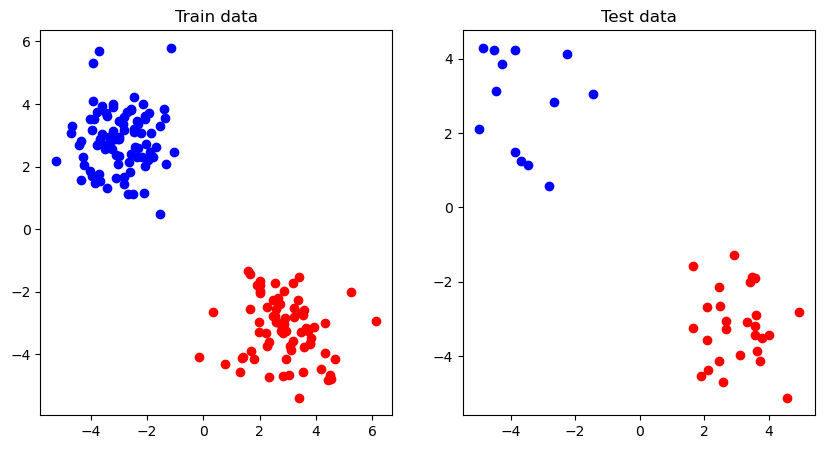

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
_ = axes[0].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red')
_ = axes[0].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue')
_ = axes[0].set_title('Train data')
_ = axes[1].scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='red')
_ = axes[1].scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='blue')
_ = axes[1].set_title('Test data')


In [101]:
np.sum(y_train == 1) / len(y_train), np.sum(y_train == 0) / len(y_train)
np.sum(y_test == 1) / len(y_test), np.sum(y_test == 0) / len(y_test)

(0.45625, 0.54375)

(0.675, 0.325)

## SVM with inbuilt functions

In [102]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM classifier
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

SVC(kernel='linear')

Accuracy: 1.00


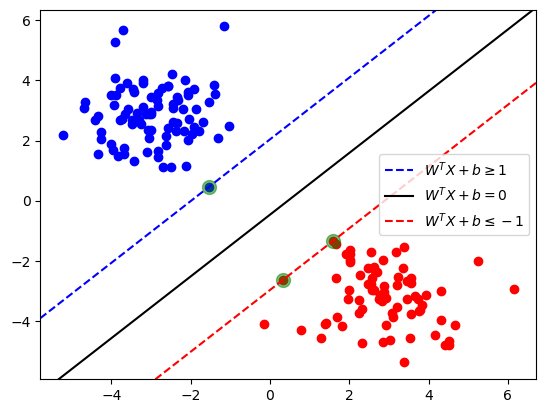

In [103]:
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red')
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue')
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], color='green', s=100, alpha=0.5)
plt.axline((0, -svm_model.intercept_[0] / svm_model.coef_[0][1] - 1 / svm_model.coef_[0][1]), slope=-svm_model.coef_[0][0] / svm_model.coef_[0][1], color='blue', linestyle='dashed', label='$W^TX + b \geq 1 $')
plt.axline((0, -svm_model.intercept_[0] / svm_model.coef_[0][1]), slope=-svm_model.coef_[0][0] / svm_model.coef_[0][1], color='black',label='$W^TX + b = 0 $')
plt.axline((0, -svm_model.intercept_[0] / svm_model.coef_[0][1] + 1 / svm_model.coef_[0][1]), slope=-svm_model.coef_[0][0] / svm_model.coef_[0][1], color='red', linestyle='dashed', label = '$W^TX + b \leq -1 $')
plt.legend()
plt.show()


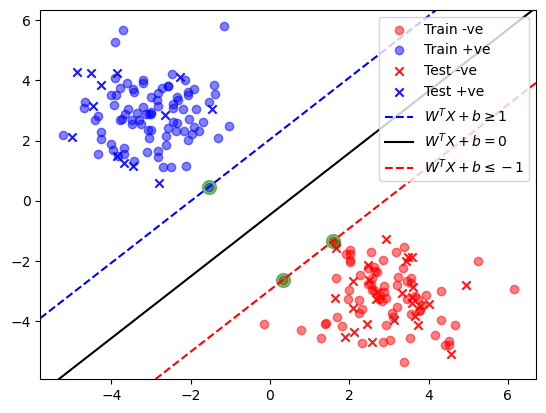

In [104]:
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red' , alpha=0.5, label='Train -ve')
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue' , alpha=0.5 , label='Train +ve')
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], color='green', s=100, alpha=0.5)

plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='red', marker='x' , alpha=0.9 , label='Test -ve')
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='blue', marker='x', alpha=0.9, label='Test +ve')


plt.axline((0, -svm_model.intercept_[0] / svm_model.coef_[0][1] - 1 / svm_model.coef_[0][1]), slope=-svm_model.coef_[0][0] / svm_model.coef_[0][1], color='blue', linestyle='dashed', label='$W^TX + b \geq 1 $')
plt.axline((0, -svm_model.intercept_[0] / svm_model.coef_[0][1]), slope=-svm_model.coef_[0][0] / svm_model.coef_[0][1], color='black',label='$W^TX + b = 0 $')
plt.axline((0, -svm_model.intercept_[0] / svm_model.coef_[0][1] + 1 / svm_model.coef_[0][1]), slope=-svm_model.coef_[0][0] / svm_model.coef_[0][1], color='red', linestyle='dashed', label = '$W^TX + b \leq -1 $')
plt.legend()
plt.show()


## Custom implementation to solve SVM